#One neuron to detect healthy or poison plants
Author : NIERDING Axel on 7/5/22
It's derived from MachineLearnia formation (big thanks to him)

In [96]:

import numpy as np #Numpy provides multidimensional array object, various derived objects (matrices, masked arrays,...) for fast operations on arrays, simulation, etc.
import matplotlib.pyplot as plt #It's a collection of functions to createas plotting area in figure, plots some lines in plotting area, decorate the plot... and work like MATLAB
from sklearn.datasets import make_blobs #Generate isotropic gaussian blobs for clustering

#Generate some data : it's plants seperate by color ; green = healthy ; yellow = poison

dimension de X: (100, 2)
dimension de y: (100, 1)


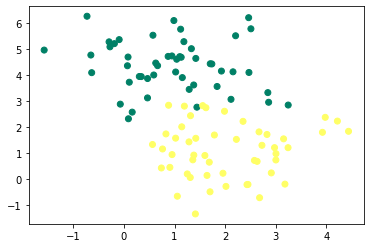

In [97]:
X, y = make_blobs (n_samples = 100, n_features = 2, centers = 2, random_state=0) #Number of points equally divided among clusters ; number of features for each sample ; number of centers to generate ; Determines random number generation for dataset creation
y = y.reshape((y.shape[0], 1)) 

print('dimension de X:', X.shape)
print('dimension de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')#Scatter plot 
plt.show()#Display plot

#Create one neuron with the same pattern as shown below

![](Model.png)

#Create the initialisation function

In [98]:
def initialisation (X):
    W = np.random.randn(X.shape[1], 1) #We shpae X matrix into vector
    b = np.random.randn(1) #b is a real number as the model below
    return (W , b)

![](Xmatrix.png)

#Create the model (X, W, b) 

In [99]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

![](AandZ.png)

#Test the model

In [100]:
A = model(X, W, b)
A.shape
#It's ok

(100, 1)

#Create cost function

In [101]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1 - A)) #minus is directly into the sum here (but it's the same as the equation below)

![](Cost.png)

#Test the cost function 

In [102]:
log_loss(A, y)
#It's ok

0.2685254416046395

#Create gradients function (A, X, y)

In [103]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return(dW, db)

![](Gradient.png)

Test the gradients

In [104]:
dW, db = gradients(A, X, y)
dW.shape
#It's ok 

(2, 1)

#Create an update function with Gradients descending and W, b

In [105]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

![](Update.png)

#Define a predict function based on sigmoid model

In [106]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5 #-> True if above or False (i.e Toxic or Healthy)

![](Sigmoid.png)

In [107]:
from sklearn.metrics import accuracy_score

#Compute the algorithm with all previous functions in One neuron

In [108]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    #initiation W, b
    W, b = initialisation(X)#The initilisation function

    
    Loss = []#Empty list which growth with learning

    for i in range(n_iter):# Learning loop (100 iterations here)
        A = model(X, W, b)# Result of Model
        Loss.append(log_loss(A, y))#Cost function
        dW, db = gradients(A, X, y)#Descending gradients functions
        W, b = update(dW, db, W, b, learning_rate)#Update (W,b)
        
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))#Print the accuracy to compare y with y pred

    plt.plot(Loss)#Plot the list Loss to visualise evolution of cost
    plt.show()#Display figure

    return (W,b)


![](ArtificialNeuron.png)

#Show the learning curve and accuracy of model

[[9.81716576e-01]
 [6.57536120e-01]
 [4.32139014e-03]
 [8.96013600e-02]
 [9.69688460e-01]
 [3.32931557e-01]
 [7.01066015e-02]
 [9.70322057e-01]
 [4.18919849e-02]
 [8.02995493e-01]
 [2.93651781e-02]
 [8.37435456e-01]
 [3.15101305e-02]
 [1.41592113e-02]
 [6.94292609e-01]
 [9.90806084e-01]
 [9.90764115e-01]
 [2.91463609e-02]
 [6.03687487e-01]
 [5.76856412e-01]
 [4.98435229e-02]
 [3.38957063e-02]
 [3.58868874e-01]
 [4.39508887e-03]
 [9.48821371e-01]
 [3.33515858e-02]
 [8.34943247e-01]
 [1.12315786e-02]
 [7.79015009e-02]
 [7.65743386e-01]
 [9.72451105e-01]
 [4.69615160e-02]
 [5.64727791e-01]
 [9.73075695e-01]
 [3.99529355e-01]
 [2.91996837e-01]
 [7.16447192e-01]
 [5.67534741e-01]
 [5.09633422e-01]
 [3.35543117e-01]
 [4.37954794e-02]
 [1.31202819e-01]
 [7.33747375e-04]
 [1.70209614e-01]
 [1.67055062e-01]
 [8.36293654e-01]
 [9.52661023e-01]
 [9.38248379e-01]
 [3.28622054e-03]
 [1.01977496e-02]
 [9.19999977e-01]
 [4.44286573e-01]
 [8.66618864e-02]
 [4.97065434e-02]
 [8.74936153e-01]
 [4.687913

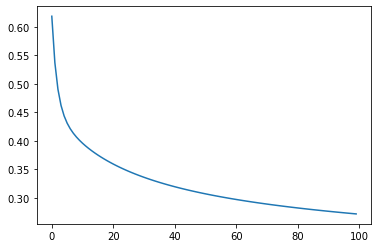

In [109]:
W, b = artificial_neuron(X, y)

#The model accuracy is 86%

Example : 

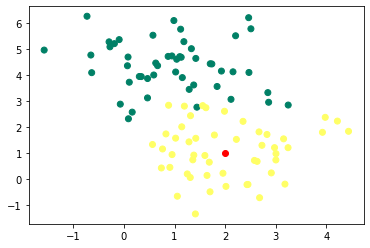

[0.85733932]


array([ True])

In [110]:
new_plant = np.array([2, 1])# Choose one plant here 2,1 (toxic)


plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')#Scatter plot of all plants
plt.scatter(new_plant[0], new_plant[1], c='r')#The plant choosen in red

plt.show()
predict(new_plant, W, b)#Test the model

#True -> Toxic, so the model is great with ~86% of accuracy
#But what is the decision line ? 

![](Equation.png)

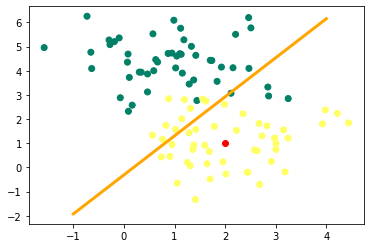

[0.85733932]


array([ True])

In [111]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)# -1 to 4 with 100 data
x1 = (-W[0] * x0 -b) / W[1]# W[0] is the first value of W

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x0, x1, c='orange', lw=3) #Plot the decision line
plt.show()
predict(new_plant, W, b)

![](Decision.png)